<a href="https://colab.research.google.com/github/VCosmo/POLOSA/blob/main/Corretto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.integrate as spi
from matplotlib import cm

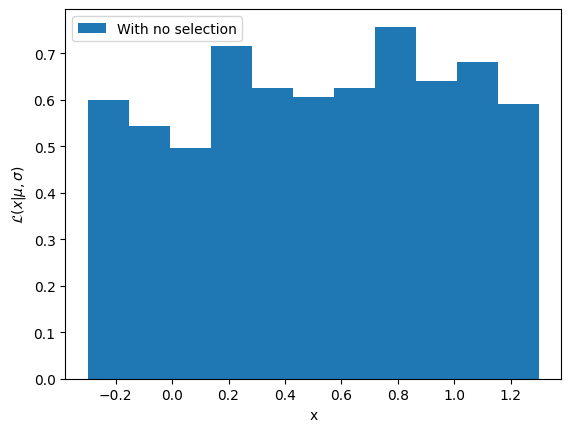

In [74]:
N = 1000
m =-0.3
M= 1.3

samples = np.random.uniform(m, M, N)
_=plt.hist(samples,bins='auto',density='True',label='With no selection') 

plt.xlabel('x')
plt.ylabel(r'$\mathcal{L}(x|\mu,\sigma)$')
plt.legend()

In [75]:
def log_uni_like(a, b, x):
    if np.all((x >= a) & (x <= b)):
        return  - len(x)*np.log(b-a)
    else:
        return -np.inf

In [76]:
def selection(a, a_max, b_min, b, min, max):
    f_uniform = lambda x, y: ((a_max - x)*(y - b_min))  
    return spi.dblquad(f_uniform, a, a_max, b_min, b)[0]

def selection(a, b, min_thr, max_thr):
    integr = np.linspace(a,b,1000)
    ppop = np.ones_like(integr)/(b-a)
    ppop[(integr<min_thr) | (integr>max_thr)] = 0.
    return np.trapz(ppop,integr)

In [130]:
dim_a = 100
dim_b = 100
a_min, a_max = -0.4, 0.4
b_min, b_max = 0.6, 1.6

N = 50
m =-0.3
M= 1.3


b_array = np.linspace(b_min, b_max, dim_b)         #tables
a_array = np.linspace(a_min, a_max, dim_a)

b_posterior = np.zeros((dim_a, dim_b))  
I = np.ones((dim_a,dim_b))

samples = []
while len(samples)<N:
      x=np.random.uniform(m, M, 1)[0]
      if (x>=-.2) & (x<=.8): #x belongs to [x_thr;infinity[ 
          samples.append(x)
        
samples=np.array(samples)

for i, a_el in enumerate(a_array):                 #selection
    for j, b_el in enumerate(b_array):
      #print(a_el, b_el)
      I[i][j] = selection(a_el, b_el, -.2, .8)


for i in range(len(a_array)):                      #likelihood
    for j in range(len(b_array)):
       b_posterior[i][j] = log_uni_like(a_array[i], b_array[j], samples) 
       

b_posterior = b_posterior - len(samples)*np.log(I)
b_posterior -=b_posterior.max()
b_posterior = np.exp(b_posterior)                

In [131]:
b_posterior

array([[0.        , 0.        , 0.        , ..., 0.36735565, 0.3836737 ,
        0.3636633 ],
       [0.        , 0.        , 0.        , ..., 0.40826551, 0.38546258,
        0.40292793],
       [0.        , 0.        , 0.        , ..., 0.37304142, 0.38788715,
        0.36631795],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [132]:
np.where(I!=1)

(array([ 0,  0,  0, ..., 99, 99, 99]), array([ 0,  1,  2, ..., 97, 98, 99]))

In [133]:
I

array([[0.8003003 , 0.8023023 , 0.8043043 , ..., 0.50550551, 0.5025025 ,
        0.5005005 ],
       [0.80630631, 0.80830831, 0.81031031, ..., 0.50650651, 0.5045045 ,
        0.5015015 ],
       [0.81331331, 0.81531532, 0.81731732, ..., 0.50950951, 0.50650651,
        0.5045045 ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.34784785, 0.34484484,
        0.34184184],
       [1.        , 1.        , 1.        , ..., 0.34384384, 0.34084084,
        0.33783784],
       [1.        , 1.        , 1.        , ..., 0.33883884, 0.33583584,
        0.33383383]])

In [134]:
b_posterior

array([[0.        , 0.        , 0.        , ..., 0.36735565, 0.3836737 ,
        0.3636633 ],
       [0.        , 0.        , 0.        , ..., 0.40826551, 0.38546258,
        0.40292793],
       [0.        , 0.        , 0.        , ..., 0.37304142, 0.38788715,
        0.36631795],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

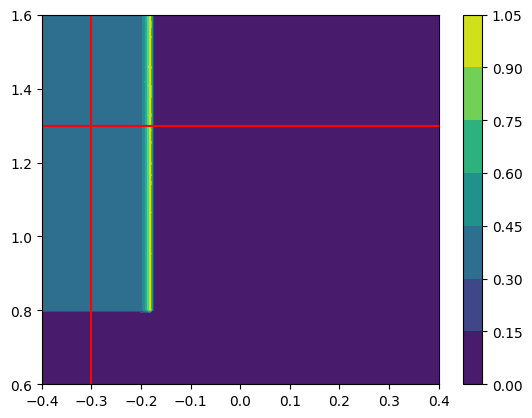

In [135]:
X, Y = np.meshgrid(a_array, b_array,indexing='ij')
plt.contourf(X,Y,b_posterior)
plt.axhline(1.3,color='r')
plt.axvline(-0.3,color='r')
plt.colorbar()

<ipython-input-11-afa1dda78035>:30: RuntimeWarning: divide by zero encountered in true_divide
  b_final = b_posterior/I
<ipython-input-11-afa1dda78035>:30: RuntimeWarning: invalid value encountered in true_divide
  b_final = b_posterior/I


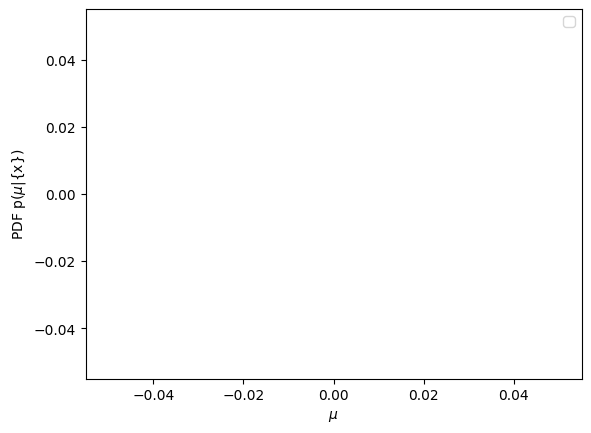

/usr/local/lib/python3.9/dist-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


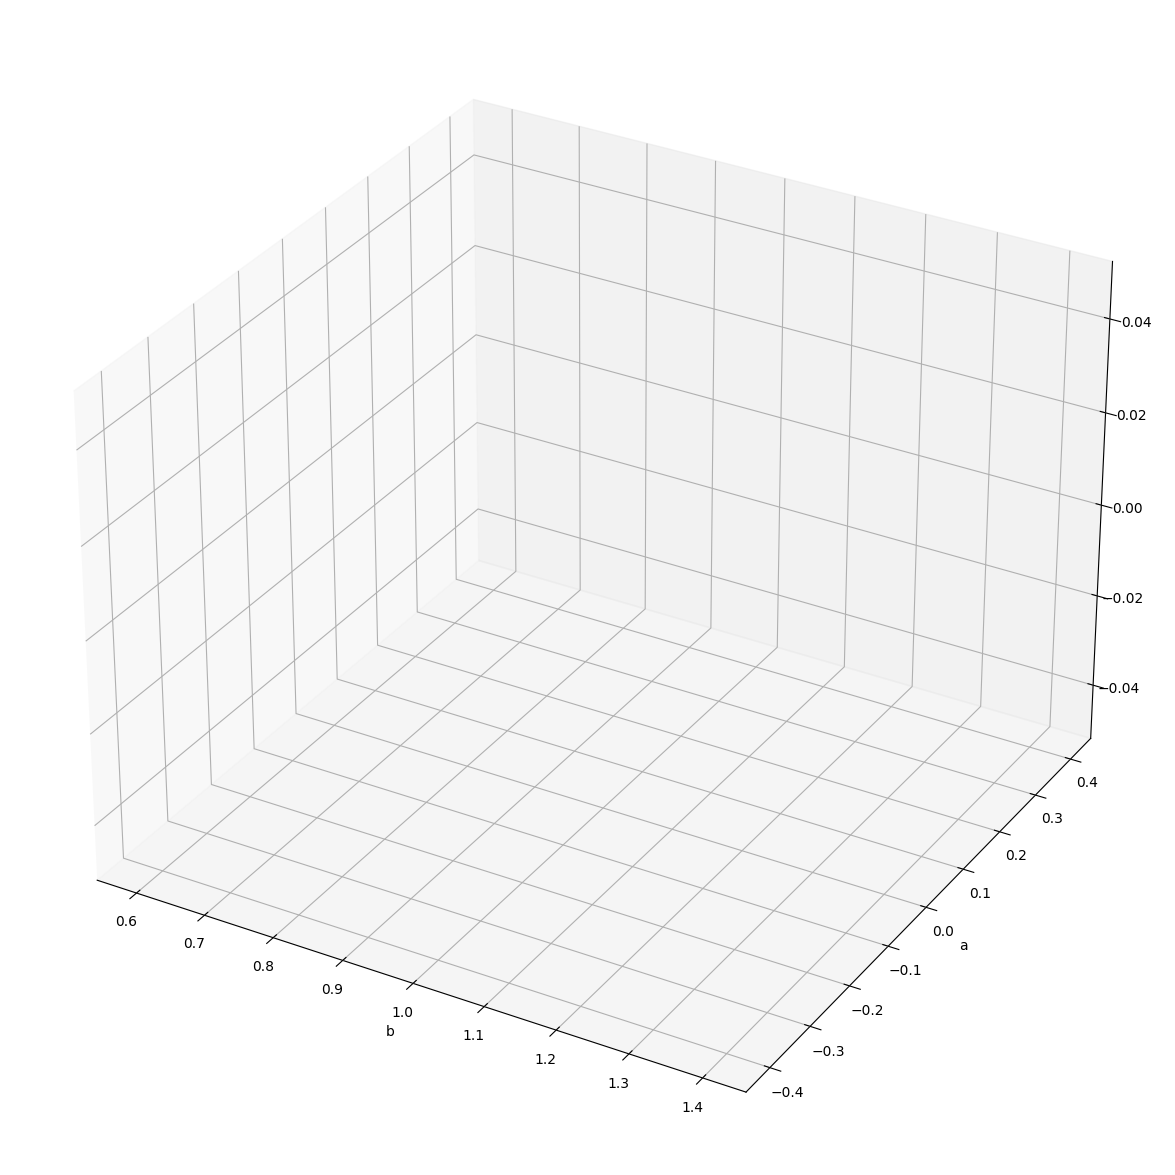

In [11]:
dim_a = 100
dim_b = 100
a_min, a_max = -0.4, 0.4
b_min, b_max = 0.6, 1.4

b_array = np.linspace(b_min, b_max, dim_b)         #tables
a_array = np.linspace(a_min, a_max, dim_a)

b_posterior = np.zeros((dim_a, dim_b))  
I = np.ones((dim_a,dim_b))

while len(samples)<N:
      x=np.random.uniform(m, M, N)
      if (x>=b_min) & (x<=a_max): #x belongs to [x_thr;infinity[ 
          samples.append(x)
        
samples=np.array(samples)

for i, a_el in enumerate(a_array):                 #selection
    for j, b_el in enumerate(b_array):
      #print(a_el, b_el)
      I[i][j] = selection(a_el, b_el, a_max, b_min)


for i in range(len(a_array)):                      #likelihood
    for j in range(len(b_array)):
       b_posterior[i][j] = uni_like(a_array[i], b_array[j], samples) 
       

b_final = b_posterior/I                

plt.plot(b_array, b_final.T, alpha=1)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('PDF p($\mu$|{x})')

plt.plot(a_array, b_final, alpha=1)
plt.legend()
plt.xlabel('$\mu$')
plt.ylabel('PDF p($\mu$|{x})')

X, Y = np.meshgrid(a_array, b_array)
fig = plt.figure(figsize=(15, 15))

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(Y, X, b_final, cmap="plasma")
ax.set_xlabel('b')
ax.set_ylabel('a')
plt.show()

In [13]:
I

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

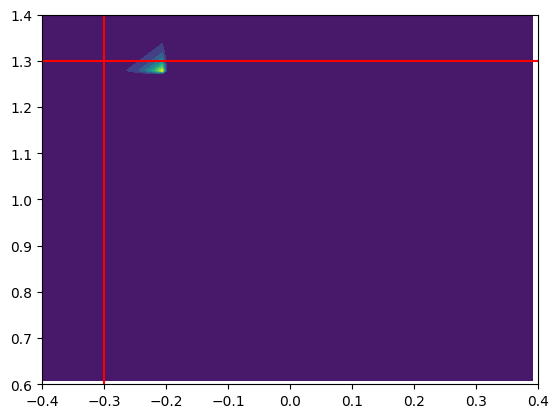

In [9]:
X, Y = np.meshgrid(a_array, b_array,indexing='ij')
plt.contourf(X,Y,b_final)
plt.axhline(1.3,color='r')
plt.axvline(-0.3,color='r')

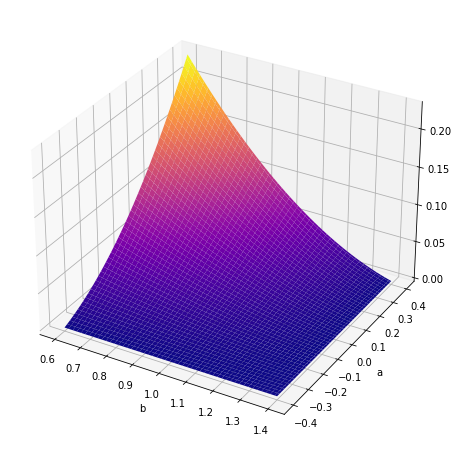

In [ ]:
X, Y = np.meshgrid(a_array, b_array)
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(Y, X, (I), cmap="plasma")
ax.set_xlabel('b')
ax.set_ylabel('a')
plt.show()